TELEDATA

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
# TeleData
# Create a quantum circuit with 3 qubits and 3 classical bits
circuit = QuantumCircuit(3, 3)

# Step 1: Entangle qubits q1 and q2
circuit.h(1) # Apply Hadamard to q1
circuit.cx(1, 2) # Apply CNOT with q1 as control and q2 as target

# Step 2: Prepare the initial state of q0 (the state to be teleported)
circuit.barrier()
circuit.cx(0, 1) # Apply CNOT with q0 as control and q1 as target
circuit.h(0) # Apply Hadamard to q0

# Step 3: Measure q0 and q1
circuit.barrier()
circuit.measure([0, 1], [0, 1])

# Step 4: Apply corrections on q2 based on the measurement results of q0 and q1
circuit.barrier()
circuit.cz(0, 2) # Apply CZ gate controlled by q0 on q2
circuit.cx(1, 2) # Apply CNOT controlled by q1 on q2

# Measure q2 to complete the teleportation
circuit.measure(2, 2)
print(circuit.draw())

                ░      ┌───┐ ░ ┌─┐    ░            
q_0: ───────────░───■──┤ H ├─░─┤M├────░──■─────────
     ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░  │         
q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──┼───■─────
     └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  │ ┌─┴─┐┌─┐
q_2: ─────┤ X ├─░────────────░──╫──╫──░──■─┤ X ├┤M├
          └───┘ ░            ░  ║  ║  ░    └───┘└╥┘
c: 3/═══════════════════════════╩══╩═════════════╩═
                                0  1             2 


TELEGATE

In [3]:
# TeleGate
# Create a quantum circuit with 3 qubits and 2 classical bits
circuit2 = QuantumCircuit(3, 2)

# Cat-Entangle q1 and q2
circuit2.h(1) # Apply Hadamard to q1
circuit2.cx(1, 2) # Apply CNOT with q1 as control and q2 as target

# Apply additional gates
circuit2.barrier()
circuit2.x(1) # Apply Pauli-X to q1
circuit2.h(2) # Apply Hadamard to q2

# Cat-Disentangle
circuit2.cz(1, 2) # Apply controlled-Z between q1 and q2
circuit2.h(1) # Apply Hadamard to q1

# Measure q1 and q2
circuit2.measure([1, 2], [0, 1])
print(circuit2.draw())

                ░                 
q_0: ───────────░─────────────────
     ┌───┐      ░ ┌───┐   ┌───┐┌─┐
q_1: ┤ H ├──■───░─┤ X ├─■─┤ H ├┤M├
     └───┘┌─┴─┐ ░ ├───┤ │ └┬─┬┘└╥┘
q_2: ─────┤ X ├─░─┤ H ├─■──┤M├──╫─
          └───┘ ░ └───┘    └╥┘  ║ 
c: 2/═══════════════════════╩═══╩═
                            1   0 


In [1]:
# pip install python-louvain

  Using cached python-louvain-0.16.tar.gz (204 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=c54277ea280874ca1ed8938bbcea91f433f793e4d9aa48a829ea7807755bb43a
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


TELEDATA GATE

In [4]:
class TeledataGate:
    def __init__(self):
        self.definition = None
        self._define()

    def _define(self):
        """
        Define the Teledata gate operation.
        """
        qr = QuantumRegister(3, 'q')
        cr = ClassicalRegister(3, 'c')
        qc = QuantumCircuit(qr, cr, name='Teledata')

        # Step 1: Entangle qubits q1 and q2
        qc.h(qr[1])
        qc.cx(qr[1], qr[2])

        # Step 2: Prepare the initial state of q0 (the state to be teleported)
        qc.barrier()
        qc.cx(qr[0], qr[1])
        qc.h(qr[0])

        # Step 3: Measure q0 and q1
        qc.barrier()
        qc.measure([qr[0], qr[1]], [cr[0], cr[1]])

        # Step 4: Apply corrections on q2 based on the measurement results of q0 and q1
        qc.barrier()
        qc.cz(qr[0], qr[2])
        qc.cx(qr[1], qr[2])

        # Measure q2 to complete the teleportation
        qc.measure(qr[2], cr[2])

        self.definition = qc

    def __call__(self, qubits, c, label=None):
        """
        Call method to attach the Teledata gate to a circuit.
        """
        if self.definition is None:
            self._define()
        return self.definition

# Create a quantum circuit with 3 qubits and 3 classical bits
circuit = QuantumCircuit(3, 3)


# Add the Teledata gate to the circuit
teledata_gate = TeledataGate()
circuit.append(teledata_gate.definition, range(3), range(3))

print(circuit.draw())


     ┌───────────┐
q_0: ┤0          ├
     │           │
q_1: ┤1          ├
     │           │
q_2: ┤2          ├
     │  Teledata │
c_0: ╡0          ╞
     │           │
c_1: ╡1          ╞
     │           │
c_2: ╡2          ╞
     └───────────┘


c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\qiskit\circuit\quantumcircuit.py:1800: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


TELEGATE GATE

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

class TeleGateGate:
    def __init__(self):
        self.definition = None
        self._define()

    def _define(self):
        """
        Define the TeleGate gate operation.
        """
        qr = QuantumRegister(2, 'q')
        cr = ClassicalRegister(2, 'c')
        qc = QuantumCircuit(qr, cr, name='TeleGate')

        # Cat-Entangle q1 and q2
        qc.h(qr[0]) # Apply Hadamard to q1
        qc.cx(qr[0], qr[1]) # Apply CNOT with q1 as control and q2 as target

        # Apply additional gates
        qc.barrier()
        qc.x(qr[0]) # Apply Pauli-X to q1
        qc.h(qr[1]) # Apply Hadamard to q2

        # Cat-Disentangle
        qc.cz(qr[1], qr[0]) # Apply controlled-Z between q1 and q2
        qc.h(qr[1]) # Apply Hadamard to q1

        # Measure q1 and q2
        qc.measure([qr[0], qr[1]], [cr[0], cr[1]])

        self.definition = qc

    def __call__(self, qubits, c, label=None):
        """
        Call method to attach the TeleGate gate to a circuit.
        """
        if self.definition is None:
            self._define()
        return self.definition

# Create a quantum circuit with 3 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

# Add the TeleGate gate to the circuit
telegate_gate = TeleGateGate()
circuit.append(telegate_gate.definition, range(2), range(2))

print(circuit.draw())


     ┌───────────┐
q_0: ┤0          ├
     │           │
q_1: ┤1          ├
     │  TeleGate │
c_0: ╡0          ╞
     │           │
c_1: ╡1          ╞
     └───────────┘


CUSTOM CIRCUIT

In [6]:
# Create a quantum circuit with 3 qubits and 3 classical bits
circuit = QuantumCircuit(5, 3)
# Add various quantum gates
circuit.x(0)  # Pauli-X gate on q0
circuit.h(3)  # Hadamard gate on q1
circuit.cx(1, 2)  # CNOT gate with q1 as control and q2 as target

# Add TeleGate operation
telegate_gate = TeleGateGate()
circuit.append(telegate_gate.definition, range(2,4), range(2))

circuit.h(1)  # Hadamard gate on q0
circuit.cx(3, 4)  # CNOT gate with q0 as control and q1 as target
circuit.cz(3, 4)  # CZ gate with q1 as control and q2 as target
circuit.cx(0,4)
circuit.cx(0,3)

# Add TeleData operation
teledata_gate = TeledataGate()
circuit.append(teledata_gate.definition, range(3), range(3))

circuit.cz(1,4)
circuit.cx(1,4)
circuit.cz(3,2)

print(circuit.draw())


     ┌───┐                               ┌───────────┐           
q_0: ┤ X ├───────────────────────■────■──┤0          ├───────────
     └───┘    ┌───┐              │    │  │           │           
q_1: ──■──────┤ H ├──────────────┼────┼──┤1          ├─■──────■──
     ┌─┴─┐┌───┴───┴───┐          │    │  │           │ │      │  
q_2: ┤ X ├┤0          ├──────────┼────┼──┤2          ├─┼──■───┼──
     ├───┤│           │          │  ┌─┴─┐│           │ │  │   │  
q_3: ┤ H ├┤1          ├──■───■───┼──┤ X ├┤           ├─┼──■───┼──
     └───┘│           │┌─┴─┐ │ ┌─┴─┐└───┘│  Teledata │ │    ┌─┴─┐
q_4: ─────┤  TeleGate ├┤ X ├─■─┤ X ├─────┤           ├─■────┤ X ├
          │           │└───┘   └───┘     │           │      └───┘
c_0: ═════╡0          ╞══════════════════╡0          ╞═══════════
          │           │                  │           │           
c_1: ═════╡1          ╞══════════════════╡1          ╞═══════════
          └───────────┘                  │           │           
c_2: ═════

QUBIT ASSIGNMENT

{1: 0, 2: 0, 3: 1, 4: 1, 0: 0}


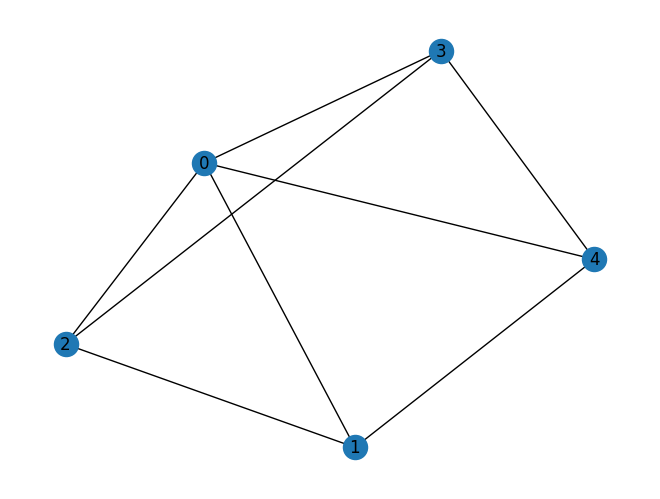

In [108]:
import networkx as nx
import community.community_louvain as community
import matplotlib.pyplot as plt

# Convert quantum circuit to weighted graph
graph = nx.Graph()
def qubit_assignment(quantum_circuit, num_qpus):
    # num_qubits = quantum_circuit.num_qubits
    gate_count = {}  # Dictionary to store gate counts between qubits
    for gate in quantum_circuit.data:
        qargs = []
        # print(gate[0].name)
        for x in gate[1]:
            temp = str(x)
            qargs.append(int(temp[-2]))
        qubits = [qubit for qubit in qargs]
        
        for i in range(len(qubits)):
            for j in range(i + 1, len(qubits)):
                q1, q2 = qubits[i], qubits[j]
                if ((q1, q2) in gate_count.keys()):
                    gate_count[(q1, q2)] += 1
                else:
                    gate_count[(q1, q2)] = 1

    # Add weighted edges to the graph based on gate counts
    for (q1, q2), count in gate_count.items():
        graph.add_edge(q1, q2, weight=count)
    
    nx.draw(graph, with_labels = True)
    # Perform graph partitioning using Louvain method
    partition = community.best_partition(graph)
    
    # Map partition indices to QPUs
    qubit_assignments = {}
    for qubit, part in partition.items():
        qubit_assignments[qubit] = part % num_qpus  # Ensure partitions are evenly distributed across QPUs
    # plt.show
    return qubit_assignments
assign = qubit_assignment(circuit, 3)
# Add group attribute to nodes

nx.set_node_attributes(graph, assign, 'group')

print(assign)

CHECK IF THE GATE REQUIRES REMOTE OPERATION

In [ ]:
def requires_remote_operation(gate):
    curr_qpu = -1
    qargs = []
    for x in gate[1]:
        temp = str(x)
        qargs.append(int(temp[-2]))
    for qb in qargs:
        if curr_qpu!=-1 and assign[qb]!=curr_qpu:
            return True
        else:
            if curr_qpu==-1:
                curr_qpu = assign[qb]
    return False

REMOTE SCHEDULING

In [113]:
def remote_gate_scheduling(quantum_circuit, network_config, qubit_assignments):
    scheduled_operations = []
    covered_gate = []
    n_epr = 0
    tele_data_operation = 0
    tele_gate_operation = 0
    for gate in quantum_circuit.data:
        if gate not in scheduled_operations and requires_remote_operation(gate):
            if gate[0].name in ['h', 'x', 'y', 'z', 's', 't', 'rx', 'ry', 'rz', 'u1', 'u2', 'u3', 'id']:
                covered_gate.append(gate)
            if gate[0].name == 'cx': 
                n_epr+=1
            elif gate[0].name == 'Teledata':
                tele_data_operation += n_epr
            elif gate[0].name == 'TeleGate':
                tele_gate_operation += n_epr
            if(tele_gate_operation<tele_data_operation):
                scheduled_operations.append(gate)
            else:
                scheduled_operations.append(gate)
            covered_gate.append(gate)    
            
    return scheduled_operations

operations = remote_gate_scheduling(circuit, graph, assign)
for opr in operations:
    print(opr[0])

Instruction(name='TeleGate', num_qubits=2, num_clbits=2, params=[])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='cz', num_qubits=2, num_clbits=0, params=[])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='cz', num_qubits=2, num_clbits=0, params=[])


In [1]:
from qiskit_aer import Aer
from qiskit import transpile

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

# VQE Implementation
def vqe_ansatz(params):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.ry(params[0], qr[0])
    return qc

def expectation_value(qc):
    # Example expectation value measurement
    qc.measure(0, 0)
    backend = Aer.get_backend('qasm_simulator')
    job = transpile(circuit, backend)
    job = backend.run(job)
    # job = execute(qc, backend, shots=1000)
    result = job.result()
    counts = result.get_counts(qc)
    expval = (counts.get('0', 0) - counts.get('1', 0)) / 1000
    return expval

def vqe():
    # Example VQE implementation
    initial_params = [0.0]
    qc = vqe_ansatz(initial_params)
    expval = expectation_value(qc)
    return expval

# QFT Implementation
def qft():
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    qc.h(0)
    qc.append(QFT(3), qr[:3])
    return qc

# Testing VQE and QFT
print("VQE:", vqe())
qc_qft = qft()
qc_qft.measure_all()
print("QFT Circuit:", qc_qft)


ImportError: cannot import name 'execute' from 'qiskit' (c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\qiskit\__init__.py)